<a href="https://colab.research.google.com/github/chayvw18/Northwind-Traders/blob/main/ANOVA_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/MAVEN_Datasets

/content/drive/MyDrive/MAVEN_Datasets


In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
orders = pd.read_csv('/content/drive/MyDrive/MAVEN_Datasets/orders.csv')
orders.head(1)

,orderID,customerID,employeeID,orderDate,requiredDate,shippedDate,shipperID,freight
0,10248,VINET,5,2013-07-04,2013-08-01,2013-07-16,3,32.38


In [6]:
orders['orderDate'] = pd.to_datetime(orders['orderDate'])
orders['requiredDate'] = pd.to_datetime(orders['requiredDate'])
orders['shippedDate'] = pd.to_datetime(orders['shippedDate'])


In [8]:
orders['shipperID'].value_counts()

,count
shipperID,
2,326
3,255
1,249


Shipping Cost by Shipper

Perform a one-way ANOVA to test if the mean freight cost is significantly different across different shippers (shipperID from orders).

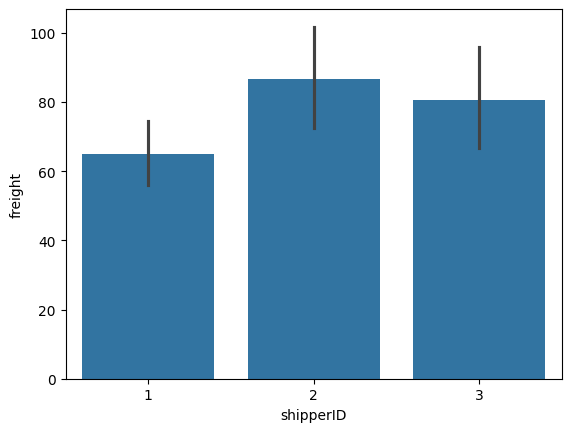

In [11]:
#bar plots for shipperID freight
sns.barplot(data=orders,
            x='shipperID',
            y='freight');

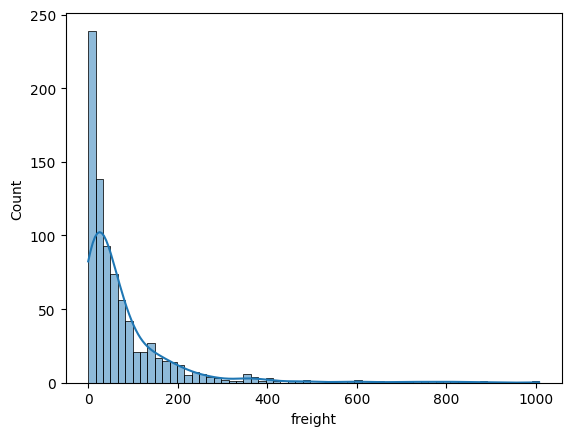

In [13]:
#histogram can be created with sns.histplot and a single x argument
sns.histplot(x='freight', kde=True, data=orders);

<Axes: xlabel='freight'>

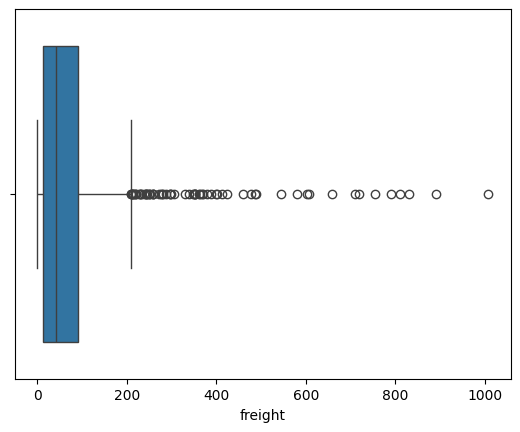

In [15]:
#boxplots to visualize the distribution for robust statistics like median and percentile since the data is skewed
sns.boxplot(x='freight', data=orders)

the median seems to be between 0 and 100 dollars with outliers from 200 to 1000 dollars Q3 + 1.5 * IQR

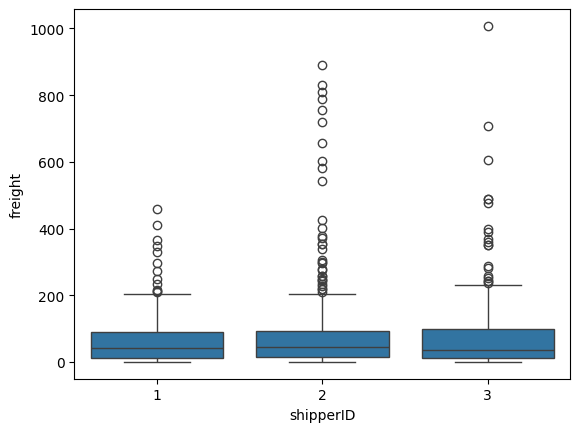

In [17]:
sns.boxplot(y='freight', x='shipperID', data=orders);

In [20]:
stat, p = stats.shapiro(orders['freight'])
print(stat)
print(p)

0.6124657855463714
1.7312534383858304e-39


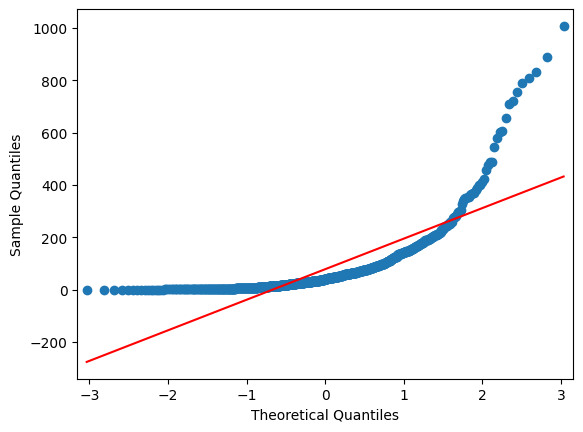

In [19]:
sm.ProbPlot(orders['freight']).qqplot(line='s')
plt.show()

In [21]:
orders['freight_log_t'] = stats.boxcox(orders['freight'], 0)

In [23]:
stat, p = stats.shapiro(orders['freight_log_t'])
print(stat)
print(p)

0.9654904177078432
4.2514186729017285e-13


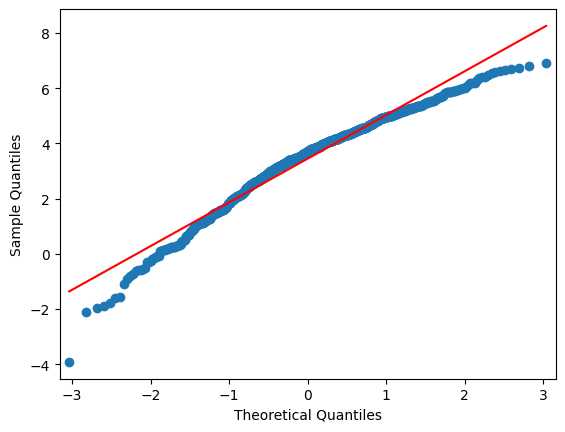

In [22]:
sm.ProbPlot(orders['freight_log_t']).qqplot(line='s')
plt.show()

In [24]:
orders['freight_logT'] = np.log1p(orders['freight'])

In [25]:
stat, p = stats.shapiro(orders['freight_logT'])
print(stat)
print(p)

0.9835188346931275
4.731861716816066e-08


Even after Box-Cox and Log Transformations the null hypothesis or normality is rejected although it did reduce skewness

In [28]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 1.9 MB/s eta 0:00:00


In [29]:
import pingouin as pg

In [32]:
pg.normality(orders, dv='freight_log_t', group='shipperID')

,W,pval,normal
shipperID,,,
3,0.975045,1.877493e-04,False
1,0.939654,1.365169e-08,False
2,0.963036,2.358898e-07,False


In [31]:
pg.anova(data=orders, dv='freight_log_t', between='shipperID')

,Source,ddof1,ddof2,F,p-unc,np2
0,shipperID,2,827,0.361166,0.696973,0.000873


In [33]:
from scipy.stats import kruskal

In [50]:
# group1 = orders[orders['shipperID'] == 'A']['freight'].dropna()
# group2 = orders[orders['shipperID'] == 'B']['freight'].dropna()
# group3 = orders[orders['shipperID'] == 'C']['freight'].dropna()

# stat,p = kruskal(group1, group2, group3)
# print('H-statistic', stat, 'p-value', p)

In [38]:
orders.groupby('shipperID')['freight_log_t'].count()

,freight_log_t
shipperID,
1,249
2,326
3,255


In [49]:
groups = []
for s, group in orders.groupby('shipperID')['freight']:
    if group.nunique() > 1:  # skip constant groups
        groups.append(group)

if len(groups) > 1:
    stat, p = kruskal(*groups)
    print("H-statistic:", stat, "p-value:", p)
else:
    print("Not enough variable groups to perform Kruskal–Wallis")

H-statistic: 0.5117053186056295 p-value: 0.774256039813096


p-value: 0.774256039813096 so after running all appropriate test we still failed to reject the null hypothesis.
There is no statisically significant evidence that the freight distributions differ between shippers